# Описание 

Аналитика для крупного интернет-магазина. Вместе с отделом маркетинга были подготовлен список гипотез для увеличения выручки.
Сначала приоритизирую гипотезы по двум фреймворкам (ICE и RICE), а затем проанализирую результаты  A/B-теста (разницу среднего количества заказов на посетителя и средних чеков заказов). 

Данные для первой части
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл orders
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## ОГЛАВЛЕНИЕ
1. Часть 1. Приоритизация гипотез.

    1.1. Применение фреймворка ICE для приоритизации гипотез
    
    1.2 Применение фреймворка RICE для приоритизации гипотез
    
    1.3 Вывод

2. Часть 2. Анализ A/B-теста
    
    2.1 Проверка корректности сбора данных и проведения А/В теста
    
    2.2 Анализ ключевых показателей

        2.2.1 Кумулятивная выручка по группам
        2.2.2 Кумулятивный средний чек по группам
        2.2.3 Относительное изменение кумулятивного среднего чека группы B к группе A
        2.2.4 Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A
        2.2.5 Среднее количество заказов по пользователям
        2.2.6 Перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
        2.2.7 Средняя стоимость заказов
        2.2.8 Перцентили стоимости заказов. Выбор границы для определения аномальных заказов.


    2.3 ПРОВЕРКА СТАТИСТИЧЕСКИХ ГИПОТЕЗ

        2.3.1 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
        2.3.2 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
        2.3.3 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
        2.3.4 Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

    2.4 ВЫВОД


Для начала установим необходимые библиотеки и скачаем данные для первой части работы


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
print(hypothesis.head(5))
hypothesis.info()
print(hypothesis.describe())
hypothesis.duplicated().sum()

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 4

0

Видим, что всего 9 гипотез. Шкала для оценки была выбрана 10-бальная. Типы столбцов соответствующие, менять не нужно. Стоит лишь переименовать столбцы, избавившись от верхнего регистра

In [4]:
hypothesis.columns = ['hypothesis','reach','impact','confidence', 'efforts']

## Часть 1. Приоритизация гипотез.

### Применение фреймворка ICE для приоритизации гипотез

ICE = Impact * confidence / effort 

In [5]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
pd.set_option('max_colwidth', 200)
hypothesis.sort_values(by = 'ice', ascending = False)


,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Видим, что по фреймворку ICE наиболее приоритетной является 8-ая гипотеза. Далее по приоритету 0-ая и 7-ая гипотезы. 



### Применение фреймворка RICE для приоритизации гипотез

RICE = Reach * Impact * confidence / effort

In [6]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by = 'rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


по фреймворку RICE наиболее приоритетная 7-ая гипотеза. Она в 2 раза более приоритетная, нежели 2-ая. 

### Вывод

По фреймворку ICE 8-ая гипотеза была самой приоритетной. Однако она затрагивает совсем небольшое количество пользователей ( reach - 1), в связи с чем по фреймворку RICE она сильно опустилась в рейтинге приоритетности. 7-ая и 0-ая гипотезы находятся в топе приоритетности и там, и там. Более того, по фреймворку RICE 7-ая сильно опережает все остальные.

2-ая гипотеза не была в топе лидеров по ICE, однако с учетом Reach (скольких пользователей затронет изменение), она стала одной из самых приоритетных, так как Reach у нее равен 10.

1,3,4,5 гипотезы стабильно имеют низкую приоритетность

<b>Рекомендации:</b> в зависимости от наличия свободных ресурсов на данный момент, выглядит наиболее логичным протестировать сначала  только 7-ую гипотезу (так как ее приоритетность по фреймворку RICE сильно больше остальных). Если же возможностей и ресурсов много, можно протестировать и другие (2-ую, 0-ую) 

## Часть 2. Анализ A/B-теста

Для начала считаем датасеты, изучим их и приведем к корректному виду


In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
print(orders.head(5))
orders.info()
print(visitors.head(5))
visitors.info()

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
<class 'pandas.core.frame.

Видим, что даты имеют неправильный тип данных. Также у столбцов имеются названия с верхним регистром

In [9]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [10]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


### Проверка корректности сбора данных и проведения А/В теста

Проверим размер групп А и В, чтобы иметь основания проводить А/В тест

In [11]:
print('Пользователей группе А :',visitors[visitors['group'] == 'A']['visitors'].sum(), 
      'Доля от общего количества: ', 
      round(visitors[visitors['group'] == 'A']['visitors'].sum()/visitors['visitors'].sum()*100, 2 ), '%')
print('Пользователей группе В :',visitors[visitors['group'] == 'B']['visitors'].sum(),
     'Доля от общего количества: ', 
      round(visitors[visitors['group'] == 'B']['visitors'].sum()/visitors['visitors'].sum()*100, 2 ), '%')


Пользователей группе А : 18736 Доля от общего количества:  49.76 %
Пользователей группе В : 18916 Доля от общего количества:  50.24 %


Количество пользователей в группах примерно равно, отличается менее чем на 1%, что позволяет нам проводить А/В тест. 

Также стоит проверить для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же. Так как данные по группе А и В передали нам в общих датасетах (orders и visitors), а соответственно столбцы с данными у них одинаковые. Стоит только проверить даты наблюдений (за одинаковые ли дни нам прислали данные для групп)

In [12]:
print((~orders[orders['group'] == 'B']['date'].isin(orders[orders['group'] == 'A']['date'].unique())).sum())
(~orders[orders['group'] == 'A']['date'].isin(orders[orders['group'] == 'B']['date'].unique())).sum()

0


0

In [13]:
print((~visitors[visitors['group'] == 'B']['date'].isin(visitors[visitors['group'] == 'A']['date'].unique())).sum())
(~visitors[visitors['group'] == 'A']['date'].isin(visitors[visitors['group'] == 'B']['date'].unique())).sum()

0


0

Все ок, у группы В нет таких дат , которых нет у группы А, и наоборот, у группы А нет таких дат , которых нет у группы В. Можно заключить, что  для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же.



Проверим дополнительно, за одинаковые ли даты  в таблицах orders и visitors представлены данные. Найдем, сколько дат из одной таблицы нет в другой

In [17]:
print((~orders['date'].isin(visitors['date'].unique())).sum())
print((~visitors['date'].isin(orders['date'].unique())).sum())

0
0


Все ок, данные даны за одинаковые даты

Также проверим, насколько нам это возможно, чтобы попавший в одну из групп посетитель оставался в этой группе до конца теста.

In [14]:
(orders[orders['group'] == 'B']['visitor_id'].isin(orders[orders['group'] == 'A']['visitor_id'].unique())).sum()

92

In [15]:
b_id = orders[orders['group'] == 'B']['visitor_id'].unique()
a_id = orders[orders['group'] == 'A']['visitor_id'].unique()

np.intersect1d(a_id, b_id)

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [16]:
orders[orders['visitor_id'] == 8300375]

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


### ! Видим, что не выполняется условие : есть такие пользователи, которые одновременно попали и в группу А, и в группу В (к примеру, пользователь в id 8300375). Таких пользователей необходимо было бы удалить, однако в данном случае таблица с визитами содержит уже агрегированные данные, эффективно очистить обе таблицы не получится, поэтому пользователей  оставим в тесте и проанализируем его результаты.

###  Кумулятивная выручка по группам

In [18]:
# находи уникальные пары дат и групп
#orders[['date', 'group']].drop_duplicates().sort_values(by = 'date')

cum_ord = orders[['date', 'group']].drop_duplicates().sort_values(by = 'date')\
.apply(
    lambda x : orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]\
    .agg({'date':'max',
         'group':'max',
          'visitor_id':'nunique',
          'transaction_id':'nunique',
         'revenue':'sum'}), axis=1
).rename(columns = {'visitor_id':'buyers',
                   'transaction_id':'orders'})


cum_visits = visitors[['date', 'group']].drop_duplicates().sort_values(by = 'date')\
.apply(lambda x: 
       visitors[(visitors['date']<=x['date']) & (visitors['group']==x['group'])]\
       .agg(
           {'date':'max',
           'group':'max',
           'visitors':'sum'}
       ),
       axis =1
      )
cum_stat = cum_ord.merge(cum_visits, on = ['date', 'group'], how='left')


cum_stat
cum_stat.head(10)

,date,group,buyers,orders,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845
5,2019-08-03,B,59,61,380996,1803
6,2019-08-04,B,75,78,489567,2573
7,2019-08-04,A,77,84,425699,2562
8,2019-08-05,B,98,101,581995,3280
9,2019-08-05,A,100,109,549917,3318


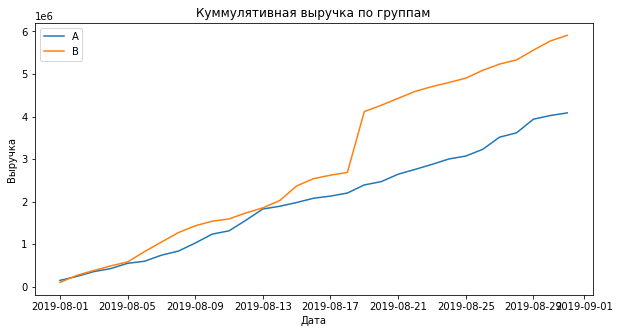

In [19]:
plt.figure(figsize=(10,5))
plt.plot(cum_stat[cum_stat['group'] == 'A']['date'], 
         cum_stat[cum_stat['group'] == 'A']['revenue'],
         label = 'A')
plt.plot(cum_stat[cum_stat['group'] == 'B']['date'], 
         cum_stat[cum_stat['group'] == 'B']['revenue'],
         label = 'B')

plt.legend()
plt.title('Куммулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Видим, что куммулятивная выручка группы В стабильно больше, чем у группы А. Однако приблизительно 19 августа 2019 наблюдается сильный скачок куммулятивной выручки у группы В, что может свидетельствовать о наличии аномально дорогих заказов там или  о всплеске числа заказов в этот день. 

На данном этапе можно выдвинуть предположение, что группа В будет иметь лучше показатели, чем группа А, и различие будет статистически значимым

### Кумулятивный средний чек по группам

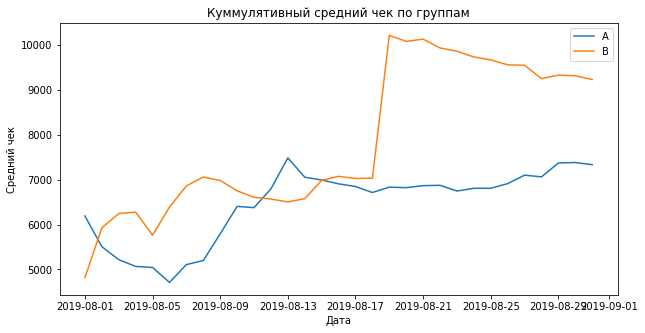

In [20]:
plt.figure(figsize=(10,5))
plt.plot(cum_stat[cum_stat['group'] == 'A']['date'], 
         cum_stat[cum_stat['group'] == 'A']['revenue']/cum_stat[cum_stat['group'] == 'A']['orders'],
         label = 'A')
plt.plot(cum_stat[cum_stat['group'] == 'B']['date'], 
         cum_stat[cum_stat['group'] == 'B']['revenue']/cum_stat[cum_stat['group'] == 'B']['orders'] ,
         label = 'B')

plt.legend()
plt.title('Куммулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

На графике видно, что большую часть времени куммулятивный средний чек группы В выше, чем у группы А. Приблизительно 19 августа 2019 мы видим резкий скачок показателя среднего чека у группы В. Это говорит о наличии там заказов с аномально большой суммой. 

Вероятно, если исключить эти выбросы, которые привели к такому скачку показателя среднего чека, разница между группами будет незначительна. Однако на данном этапе с учетом аномалий - куммулятивный средний чек группы В приблизительно на 2000 у.е. больше, чем у группы А.

### Относительное изменение кумулятивного среднего чека группы B к группе A

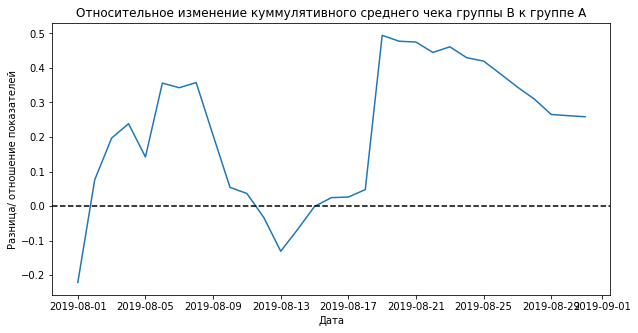

In [21]:
plt.figure(figsize=(10,5))

merged_cum = cum_stat[cum_stat['group'] == 'A'][['date','buyers','orders','visitors','revenue']]\
.merge(
    cum_stat[cum_stat['group'] == 'B'][['date','buyers','orders','visitors','revenue']], 
    on = 'date', 
    how = 'left', 
    suffixes = ['A','B']
)

plt.plot(merged_cum['date'], 
         (merged_cum['revenueB']/merged_cum['ordersB'])/\
         (merged_cum['revenueA']/merged_cum['ordersA']) -1
        )

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение куммулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Разница/ отношение показателей')

plt.show()

График относительного изменения подтверждает,что большую часть времени средний чек группы В выше, чем у группы А. За исключением периода где-то с 12 по 15 августа - в это время средний чек группы А возрос и превышал средний чек группы В.

Есть резкие скачки, что свидетельствует о наличии выбросов. Поэтому после исключения их из наблюдения результаты могут поменяться

### График кумулятивного среднего количества заказов на посетителя по группам

In [22]:

merged_cum.head(5)


,date,buyersA,ordersA,visitorsA,revenueA,buyersB,ordersB,visitorsB,revenueB
0,2019-08-01,20,24,719,148579,20,21,713,101217
1,2019-08-02,38,44,1338,242401,43,45,1294,266748
2,2019-08-03,62,68,1845,354874,59,61,1803,380996
3,2019-08-04,77,84,2562,425699,75,78,2573,489567
4,2019-08-05,100,109,3318,549917,98,101,3280,581995


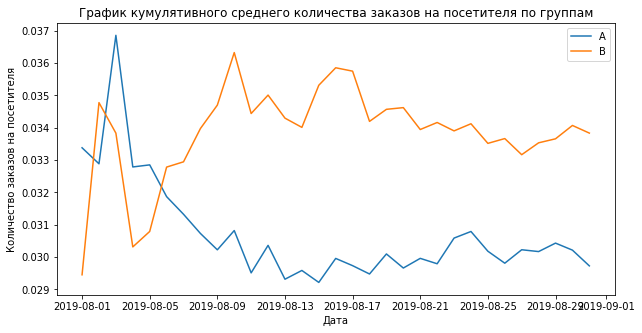

In [23]:
plt.figure(figsize=(10,5))
plt.plot(merged_cum['date'], 
         merged_cum['ordersA']/ merged_cum['visitorsA'], label = 'A')

plt.plot(merged_cum['date'], 
         merged_cum['ordersB']/ merged_cum['visitorsB'], label = 'B')

plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов на посетителя')
plt.show()

В начале наблюдений заметны сильные флуктуации в среднем количестве заказов на посетителя, однако затем данный показатель стабилизируется. У группы В среднее количество заказов на посетителя в итоге больше, чем у группы А. 

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

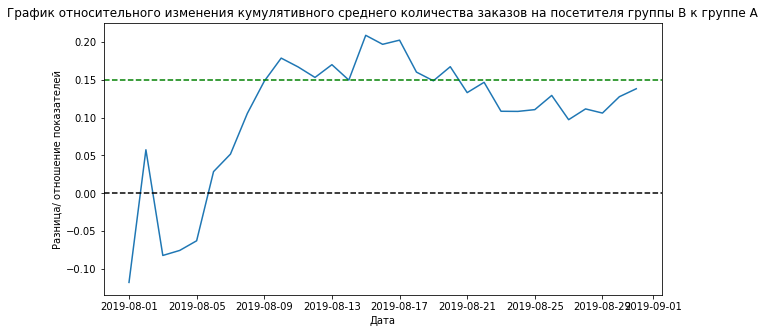

In [24]:
plt.figure(figsize=(10,5))
plt.plot(merged_cum['date'], 
         (merged_cum['ordersB']/ merged_cum['visitorsB'])/(merged_cum['ordersA']/ merged_cum['visitorsA'])-1)

plt.axhline(y=0, color = 'black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Разница/ отношение показателей')
plt.axhline(y=0.15, color = 'green', linestyle = '--')
plt.show()

Видим, что в начале наблюдений среднее количество заказов на посетителя у группы А бывало больше, чем у группы В. Однако где-то после 6 августа группа В стала стабильным лидером по нему. 

В целом можно сказать, что картина по среднему количествау заказов на посетителя  ясна - у группы В она стабильно выше . Около значения  0.15 намечается тенденция к стабилизации отношения показателей группы В к группе А

Однако, прежде чем делать окончательные выводы, стоит проанализировать аномалии, возможно, они изменят картину.


### Среднее количество заказов по пользователям

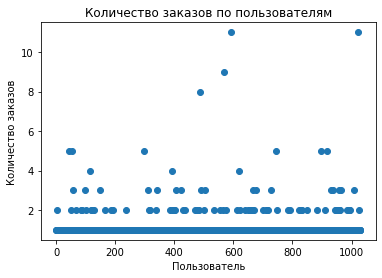

In [25]:
orders_by_user = orders.groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'})


plt.scatter(range(len(orders_by_user)), orders_by_user['transaction_id'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

Из графика видно, что большинство пользователей имеют 1 заказ. И лишь немногие имеют более 3 заказов. Самое максимальное количество заказов - 11. Такие клиенты исключение, поэтому их мы их в дальнейшем исключим из наблюдений, чтобы посмотреть на "среднюю" картину.



### Перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.


In [26]:
np.percentile(orders_by_user['transaction_id'], [95,99])

array([2., 4.])

Считаю, что аномальные пользователи должны считаться от 4 заказов (включительно) и больше, так как это соответствует 99-ому персентилю, а также визуально на точечном графике такие пользователи составляют меньшинство.

### Средняя стоимость заказов

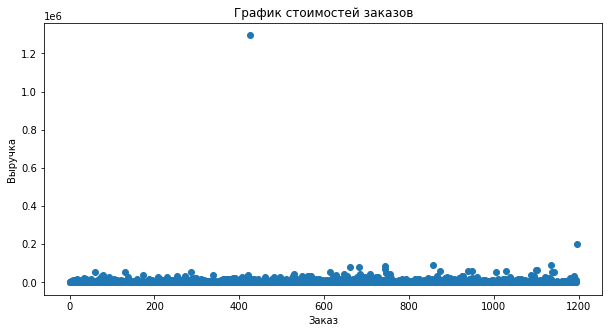

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(orders)), orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Заказ')
plt.ylabel('Выручка')
plt.show()

из графика видим, что есть один крайне выделяющийся заказ с суммой более 1,2 млн у.е. Его точно можно считать выбросом. Этот заказ настоко больше остальных, что придется еще смотреть на график в другом масштабе. Еще один заметный выделяющийся заказ на сумму около 200000 у. е. Остальные заказы значительно ниже по выручке

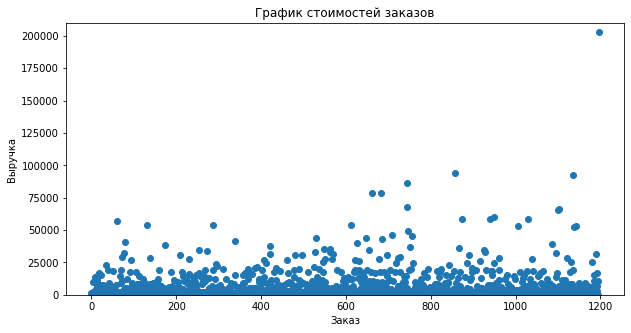

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(orders)), orders['revenue'])
plt.ylim(0, 210000)
plt.title('График стоимостей заказов')
plt.xlabel('Заказ')
plt.ylabel('Выручка')
plt.show()

Если судить исключительно визуально, то границу выбросов я бы установила где-то на 60000 у.е. Посмотрим на 95-й и 99-й персентиль, чтобы принять окончательное решение

### Перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [29]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

99-й персентиль соответствует значению выручки 58233.2, поэтому предлагаю установить границу выбросов на нем. 95-й персентиль не берем, так как нам все таки важно рассматривать не только  дешевые заказы

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

чтобы провести данный анализ необходимо добавить пользователей, которые не совершили ни одного заказа

In [30]:
#для группы А
users_A = orders[orders['group'] == 'A']\
.groupby('visitor_id', as_index = False)\
.agg({'transaction_id':'nunique'})
    
    
user_orders_A = pd.concat([
    users_A['transaction_id'],
    pd.Series(0, 
              index = np.arange(
                  visitors[visitors['group'] == 'A']['visitors'].sum()- len(users_A['transaction_id'])
              )
             )
])

#для группы В
users_B = orders[orders['group'] == 'B']\
.groupby('visitor_id', as_index = False)\
.agg({'transaction_id':'nunique'})
    
    
user_orders_B = pd.concat([
    users_B['transaction_id'],
    pd.Series(0, 
              index = np.arange(
                  visitors[visitors['group'] == 'B']['visitors'].sum()- len(users_B['transaction_id'])
              )
             )
])


Проверим распределение на нормальность критерием Шапиро-Уилка. Нулевая гипотеза: распределение нормальное. Альтернативная гипотеза: распределение не нормальное.

Н0: распределение нормальное

На:распределение не нормальное

alpha = 0,05

При уровне статистической значимости 0,05 для распределения выручки отвергаем нулевую гипотезу (т.к. p-значение<0,05) : распределение не нормально. Поэтому некорректно будет пользоваться параметрическими тестами

In [31]:
print('p-значение: ', st.shapiro(user_orders_B)[1])
print('p-значение: ', st.shapiro(user_orders_A)[1])


p-значение:  0.0
p-значение:  0.0


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Проведем непараметрический тест Уилкоксона-Манна-Уитни

Н0:   среднее количество заказов на посетителя в группах А и В равны. Статистически значимых различий в среднем количестве заказов на посетителя между группами по сырым данным нет.

На:  среднее количество заказов на посетителя в группах А и В не равны.  Статистически значимые различия в среднем количестве заказов на посетителя между группами по сырым данным есть.

alpha = 0,05

In [32]:
user_orders_A

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Length: 18736, dtype: int64

In [32]:
print('p-значение: ')
print("{0:.5f}".format(st.mannwhitneyu(user_orders_A,user_orders_B)[1]))

p-значение: 
0.01679


По неочищенным от выбросов данных p-value непараметрического теста Уилкоксона-Манна-Уитни < 0.05 (классического уровня значимости), что означает, что нулевая гипотеза (о равенстве среднего количества заказов на посетителя в группах А и В) отвергается в сторону альтернативной (что средние групп не равны).

 Посмотрим дополнительно, у какой из групп данный показатель больше

In [33]:
print('Относительная разница среднего количество заказов на посетителя группы В к группе А: ')
print("{0:.3f}".format(user_orders_B.mean()/user_orders_A.mean()-1))

Относительная разница среднего количество заказов на посетителя группы В к группе А: 
0.138


Видим, что у группы B где-то на 13,8%  среднее количество заказов на посетителя больше, чем у группы А (по неочищенным от выбросов данных). То есть можно сказать, что среднее количество заказов на посетителя у группы В статистически значимо больше, чем у группы А

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим распределение на нормальность критерием Шапиро-Уилка. Нулевая гипотеза: распределение нормальное. Альтернативная гипотеза: распределение не нормальное. 

Н0: распределение нормальное

На:распределение не нормальное

alpha = 0,05

При уровне статистической значимости 0,05 для распределения выручки отвергаем нулевую гипотезу: распределение не нормальное. Поэтому некорректно будет пользоваться параметрическими тестами

In [34]:
print('p-значение: ', st.shapiro(orders[orders['group'] == 'A']['revenue'])[1])
print('p-значение: ', st.shapiro(orders[orders['group'] == 'B']['revenue'])[1])


p-значение:  1.739723833199812e-34
p-значение:  0.0


Проведем непараметрический тест Уилкоксона-Манна-Уитни

Н0:   средние чеки заказов в группах А и В равны. Статистически значимых различий в среднмх чеках заказов на посетителя между группами по сырым данным нет.


На:  средние чеки заказов в группах А и В не равны. Статистически значимые различия в среднмх чеках заказов на посетителя между группами по сырым данным есть.


alpha = 0,05

In [57]:
print('p-значение: ')
print("{0:.5f}".format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                                       orders[orders['group'] == 'B']['revenue'])[1]))

p-значение: 
0.72929


По неочищенным от выбросов данных p-value непараметрического теста Уилкоксона-Манна-Уитни сильно > 0.05 , что означает, что нулевая гипотеза (о равенстве среднего чека заказа в группах А и В) не может быть отвергнута. То есть нет статистически значимого различия средних чеков у групп


In [62]:
print('Относительная разница между группами ')
print("{0:.5f}".format(orders[orders['group'] == 'B']['revenue'].mean()/\
                       orders[orders['group'] == 'A']['revenue'].mean()-1))

Относительная разница между группами 
0.25871


Несмотря на то, что вроде средний чек заказов группы В на 25,9% больше, чем у А (по неочищенным данных). Однако эта разница статистически не значима

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для этого для начала нужно найти выбросы, а затем убрать их из наблюдений. Как было определено ранее, выбросами мы решили считать тех пользователей, которые сделали 4 заказа и выше. А также тех пользователей, которые совершили заказы на сумму  более значения 99-го персентиля

In [37]:
outliers = orders[orders['revenue']>np.percentile(orders['revenue'], 99)]['visitor_id']
outliers = outliers.append( users_A[users_A['transaction_id']>=np.percentile(orders_by_user['transaction_id'], 99)]['visitor_id'],
                           ignore_index = True
                          ).drop_duplicates().sort_values()


теперь уберем выбросы из выборок

In [38]:
user_orders_A = pd.concat([
    users_A[~users_A['visitor_id'].isin(outliers)]['transaction_id'],
    pd.Series(0, 
              index = np.arange(
                  visitors[visitors['group'] == 'A']['visitors'].sum()- len(users_A['transaction_id'])
              )
             )
])

user_orders_B = pd.concat([
    users_B[~users_B['visitor_id'].isin(outliers)]['transaction_id'],
    pd.Series(0, 
              index = np.arange(
                  visitors[visitors['group'] == 'B']['visitors'].sum()- len(users_B['transaction_id'])
              )
             )
])

и повторно проведем непараметрический тест Уилкоксона-Манна-Уитни

Н0:   среднее количество заказов на посетителя в группах А и В равны.  Статистически значимых различий в среднем количестве заказов на посетителя между группами по очищенным данным нет.

На:  среднее количество заказов на посетителя в группах А и В не равны. Статистически значимые различия в среднем количестве заказов на посетителя между группами по очищенным данным есть.

alpha = 0,05

In [63]:
print('p-значение: ')
print("{0:.5f}".format(st.mannwhitneyu(user_orders_A,user_orders_B)[1]))

p-значение: 
0.01410


По очищенным от выбросов данных картина аналогичная, p-value непараметрического теста Уилкоксона-Манна-Уитни < 0.05 (классического уровня значимости), что означает, что нулевая гипотеза (о равенстве среднего количества заказов на посетителя в группах А и В) отвергается в сторону альтернативной (что средние групп не равны).


In [64]:
print('Относительная разница значений между группами ')
print("{0:.3f}".format(user_orders_B.mean()/user_orders_A.mean()-1))

Относительная разница значений между группами 
0.167


Видим, что после исключения аномалий разница даже возрасла. У группы B где-то на 16,7% среднее количество заказов на посетителя больше, чем у группы А (по очищенным от выбросов данных). То есть можно сказать, что среднее количество заказов на посетителя у группы В статистически значимо больше, чем у группы А

### Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Н0: средние чеки заказов в группах А и В равны. Статистически значимых различий в среднмх чеках заказов на посетителя между группами по очищенным данным нет.

На: средние чеки заказов в группах А и В не равны. Статистически значимые различия в среднмх чеках заказов на посетителя между группами по очищенным данным есть.

alpha = 0,05

In [65]:
print('p-значение: ')
print("{0:.5f}".format(st.mannwhitneyu(orders[(orders['group'] == 'A') & (~orders['visitor_id'].isin(outliers))]['revenue'],
                                       orders[(orders['group'] == 'B') & (~orders['visitor_id'].isin(outliers))]['revenue'])[1]))

p-значение: 
0.95146


Видим, что после исключения аномалий общая картина не поменялась. Мы только с еще большей уверенностью не отвергаем нулевую гипотезу о равенстве средних чеков заказов в группах А и В. То есть нет статистически значимого различия средних чеков у групп.

Посмотрим теперь на относительную разницу средних чеков групп

In [66]:
print('Относительная разница значений между группами: ')
print("{0:.5f}".format(orders[(orders['group'] == 'B') & (~orders['visitor_id'].isin(outliers))]['revenue'].mean()/\
                       orders[(orders['group'] == 'A') & (~orders['visitor_id'].isin(outliers))]['revenue'].mean()-1))

Относительная разница значений между группами: 
-0.01374


Видим, что относительная разница мизерная. Более того, после исключения выбросов, средний чек заказов группы В стал меньше, чем у группы А (хоть и совсем на чуть-чуть)

### ВЫВОД

На начальном этапе анализа  было выявлено, что не выполняется условие проведения А/В теста: есть такие пользователи, которые одновременно попали и в группу А, и в группу В (к примеру, пользователь в id 8300375). 

Но так как анализ все равно был проведен, из него можно сделать следующие выводы :
- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по "сырым" данным, так и после отсеивания выбросов. У группы В этот показатель статистически значимо выше, чем у группы А
- По "сырым" и очищенным данным нет статистически значимого различия по среднему чеку между группами
- По графикам куммулятивных показателей видно, что они зафиксировались около среднего значения

Тест стоит остановить. Группа В победила 